In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.precision', 18)
np.set_printoptions(precision=18)

In [2]:
def upload_df(file_path, start_basis_size = 900):
  df = pd.read_csv(file_path)
  df['Basis Size'] = df['Basis Size'].astype(int)

  for i in range(df['Basis Size'].values[0],start_basis_size + 1,100):
    df.drop(df[df['Basis Size'] == i].index, inplace = True)

  return df

In [3]:
def upload_df1(file_path):
  df = pd.read_csv(file_path)
  df['basis size'] = df['basis size'].astype(int)

  return df[2:]

In [4]:

def graph(df: pd.DataFrame, n_cols: int = 4):
    """
    Generates and displays a grid of plots for each feature in a DataFrame
    against the 'basis size' column.

    Args:
        df (pd.DataFrame): The input DataFrame. It must contain a column
                           named 'basis size' (case-insensitive).
        n_cols (int): The number of columns to use in the plot grid.
                      Defaults to 4.
    """
    # Create a copy to avoid changing the original DataFrame
    df_plot = df.copy()

    # Standardize column names to lowercase for consistency
    df_plot.columns = [col.lower() for col in df_plot.columns]

    # Check for the required 'basis size' column
    if 'basis size' not in df_plot.columns:
        raise ValueError("Input DataFrame must contain a 'basis size' column.")

    # Prepare the data and identify features to plot
    df_plot['basis size'] = df_plot['basis size'].astype(int)
    features = sorted([col for col in df_plot.columns if col != 'basis size'])
    n_features = len(features)

    # Handle the case of no features to plot
    if n_features == 0:
        print("No feature columns found to plot.")
        return

    # Calculate the required number of rows for the grid
    n_rows = (n_features + n_cols - 1) // n_cols

    # Create the figure and subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3.5 * n_rows), sharex=True)
    fig.suptitle('Features vs. Basis Size', fontsize=16, y=1.03)

    # Flatten the axes array for easy, single-loop iteration
    axes = axes.flatten()

    # Plot each feature against the basis size
    for i, feature in enumerate(features):
        ax = axes[i]
        ax.plot(df_plot['basis size'], df_plot[feature], marker='o', linestyle='-', markersize=5)

        # Format titles and labels for readability
        ax.set_title(feature.replace('_', ' ').title())
        ax.set_xlabel('Basis Size')
        ax.set_ylabel('Value')
        ax.grid(True, linestyle='--', alpha=0.6)

    # Clean up by removing any empty, unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout to prevent plot elements from overlapping
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

In [5]:
li_2se = upload_df('/home/trulyaldi/extrapolation/large-dataset/Li_2Se.csv')
li_2se = li_2se.drop(columns = ['SO1', 'SO2'])
li_2se = li_2se.rename(columns= {'Basis Size': 'basis size'})


In [6]:
li_2se_inf = li_2se.loc[li_2se['basis size'] == max(li_2se['basis size'])]
li_2se_init = li_2se.iloc[:-1]

In [7]:

be_1se = upload_df('/home/trulyaldi/extrapolation/large-dataset/Be_1Se.csv')
be_1se = be_1se.drop(columns = ['SO1', 'SO2'])
be_1se = be_1se.rename(columns= {'Basis Size': 'basis size'})
be_1se_inf = be_1se.loc[be_1se['basis size'] == max(be_1se['basis size'])]
be_1se_init = be_1se.iloc[:-1]

In [8]:


be_3po = upload_df('/home/trulyaldi/extrapolation/large-dataset/Be_3Po.csv')
be_3po = be_3po.drop(columns = ['SO1', 'SO2'])
be_3po = be_3po.rename(columns= {'Basis Size': 'basis size'})
be_3po_inf = be_3po.loc[be_3po['basis size'] == max(be_3po['basis size'])]
be_3po_init = be_3po.iloc[:-1]

In [9]:
be_1po = upload_df('/home/trulyaldi/extrapolation/large-dataset/Be_1Po.csv')
be_1po = be_1po.drop(columns = ['SO1', 'SO2'])
be_1po = be_1po.rename(columns= {'Basis Size': 'basis size'})
be_1po_inf = be_1po.loc[be_1po['basis size'] == max(be_1po['basis size'])]
be_1po_init = be_1po.iloc[:-1]

In [10]:
li_2po = upload_df('/home/trulyaldi/extrapolation/large-dataset/Li_2Po.csv')
li_2po = li_2po.drop(columns = ['SO1', 'SO2'])
li_2po = li_2po.rename(columns= {'Basis Size': 'basis size'})
li_2po_inf = li_2po.loc[li_2po['basis size'] == max(li_2po['basis size'])]
li_2po_init = li_2po.iloc[:-1]

In [11]:
be_3se = upload_df('/home/trulyaldi/extrapolation/large-dataset/Be_3Se.csv')
be_3se = be_3se.drop(columns = ['SO1', 'SO2'])
be_3se = be_3se.rename(columns= {'Basis Size': 'basis size'})
be_3se_inf = be_3se.loc[be_3se['basis size'] == max(be_3se['basis size'])]
be_3se_init = be_3se.iloc[:-1]

In [12]:
be_4pe = upload_df1('/home/trulyaldi/extrapolation/small-dataset/B_4Pe-01 dataframe.csv')
be_4pe


,basis size,Energy,delta(r_1),drach_delta(r_1),delta(r_12),drach_delta(r_12),MV,drach_MV,r_1,r_12,1/r^2_1,1/r^2_12,1/r_1,1/r_12,r^2_1,r^2_12,SO1,SO2
2,1000,-24.520795141788500615,14.094443511165410499,14.111982259119420391,0.344114046767292792,0.343356187055075590,-678.811882899733745944,-679.684975430042982225,1.354831349756234093,2.276965976531834190,18.454036808343431630,1.718588646677694065,2.266334425977929001,0.761675716607861819,3.156775455387792917,6.913496181922239359,1.042870491372932085,-0.664066795185019432
3,2000,-24.520821653207448776,14.104918078870699816,14.112064755832639307,0.343703723352494106,0.343361507825495016,-679.234898910498031910,-679.670905350935981915,1.354878065720392932,2.277060934028347194,18.454134464909650148,1.718550687244529085,2.266333026308417153,0.761668156255966733,3.157223699765319136,6.914403039777416105,1.043001164049672802,-0.664057255337418773
4,3000,-24.520825359839829360,14.105952549088719650,14.112077492006079638,0.343545660558655486,0.343362480638820911,-679.263568816273391349,-679.662312795916136565,1.354885130634509105,2.277075263637479807,18.454149727779409318,1.718543703773601994,2.266332831692075889,0.761666999976677195,3.157294480502412792,6.914543475029698349,1.043023278780959684,-0.664055779619588948
5,4000,-24.520826430679949937,14.109612652837110858,14.112082486723730668,0.343468027478234017,0.343362822158893521,-679.422899586508719949,-679.668100350621216421,1.354887301886577022,2.277079671132644201,18.454155326120151415,1.718541633459341078,2.266332764717922998,0.761666652623910978,3.157316879258369902,6.914587421552509383,1.043027570072603938,-0.664056510041404535
6,5000,-24.520826846838300384,14.110050047613949431,14.112084455498209223,0.343461440741216317,0.343362924898035993,-679.433647734138276064,-679.671454447992005043,1.354888063870014037,2.277081235203803011,18.454157650945738567,1.718540960163420950,2.266332755545521049,0.761666536158327911,3.157324922656183919,6.914603254618152839,1.043031454146560844,-0.664057746197039944
7,6000,-24.520827047067420779,14.110104406254039944,14.112085082477879183,0.343427921386567025,0.343363012827127112,-679.434067518592883062,-679.673877545919594922,1.354888421657290953,2.277081960726827781,18.454158455101790537,1.718540509778986980,2.266332751502252219,0.761666480256476985,3.157328577120487090,6.914610266353565571,1.043033595008665770,-0.664056741921659643
8,7000,-24.520827149823560376,14.110178752709039429,14.112085657924499316,0.343426105175198726,0.343363045273543388,-679.426668644312258039,-679.674424894830735866,1.354888650542271922,2.277082402054936949,18.454159101391439890,1.718540325753336040,2.266332743107048131,0.761666444599958581,3.157331003031111027,6.914614781450396208,1.043034699762022566,-0.664056187214557281
9,8000,-24.520827211342719920,14.110558082719119710,14.112085985781350317,0.343422130371409007,0.343363070044534979,-679.442528479677093856,-679.674755589329151917,1.354888761947317111,2.277082628038670009,18.454159470761780426,1.718540193444084041,2.266332740663254963,0.761666425724515594,3.157332165344767017,6.914617034287376285,1.043035045495886770,-0.664055921301005214
10,9000,-24.520827253963098258,14.110594977241280645,14.112086160350749253,0.343418821469966995,0.343363089219242079,-679.443808218509957442,-679.674318438270802289,1.354888834329259106,2.277082773279676786,18.454159674546630754,1.718540113444809947,2.266332740012630076,0.761666414470014375,3.157332916667856093,6.914618451447767100,1.043035148982354166,-0.664055745005720399
11,10000,-24.520827282781539225,14.111080494469840474,14.112086376588889536,0.343417652109100524,0.343363097411081675,-679.462921697260753717,-679.674340103338295194,1.354888837390602951,2.277082738577646204,18.454159900635708880,1.718540078266719950,2.266332747035966211,0.761666419437040609,3.157333090183688018,6.914618275025382843,1.043035539023278169,-0.664054807934850055


In [15]:
import importlib, extrapolator
importlib.reload(extrapolator)


<module 'extrapolator' from '/home/trulyaldi/extrapolation/src/extrapolator.py'>

Available columns to analyze:
- Energy
- MV
- drach_MV
- OO
- 1/r^2_1
- 1/r^2_12
- 1/r_1
- 1/r_12
- r_1
- r_12
- r^2_1
- r^2_12
- delta(r_1)
- delta(r_12)
- drach_delta(r_1)
- drach_delta(r_12)
- prval(r_1)
- prval(r_12)
------------------------------

--- Fitting Exponential Model ---
  No known convergent value provided, using weight power n=1 for Exponential

--- Fitting Exponential SQ Model ---
  No known convergent value provided, using weight power n=1 for Exponential SQ

--- Fitting Power Law Model ---
  No known convergent value provided, using weight power n=1 for Power Law

FINAL RESULTS FOR 'Energy'

Exponential Model:
  Extrapolated Limit (C): -7.410156532526507966
  Total Uncertainty:      ± 0.000000000007316760

Exponential √x Model:
  Extrapolated Limit (C): -7.410156532671366314
  Total Uncertainty:      ± 0.000000000019002206

Power Law Model:
  Extrapolated Limit (C): -7.410156535618008355
  Total Uncertainty:      ± 0.000000000488837530


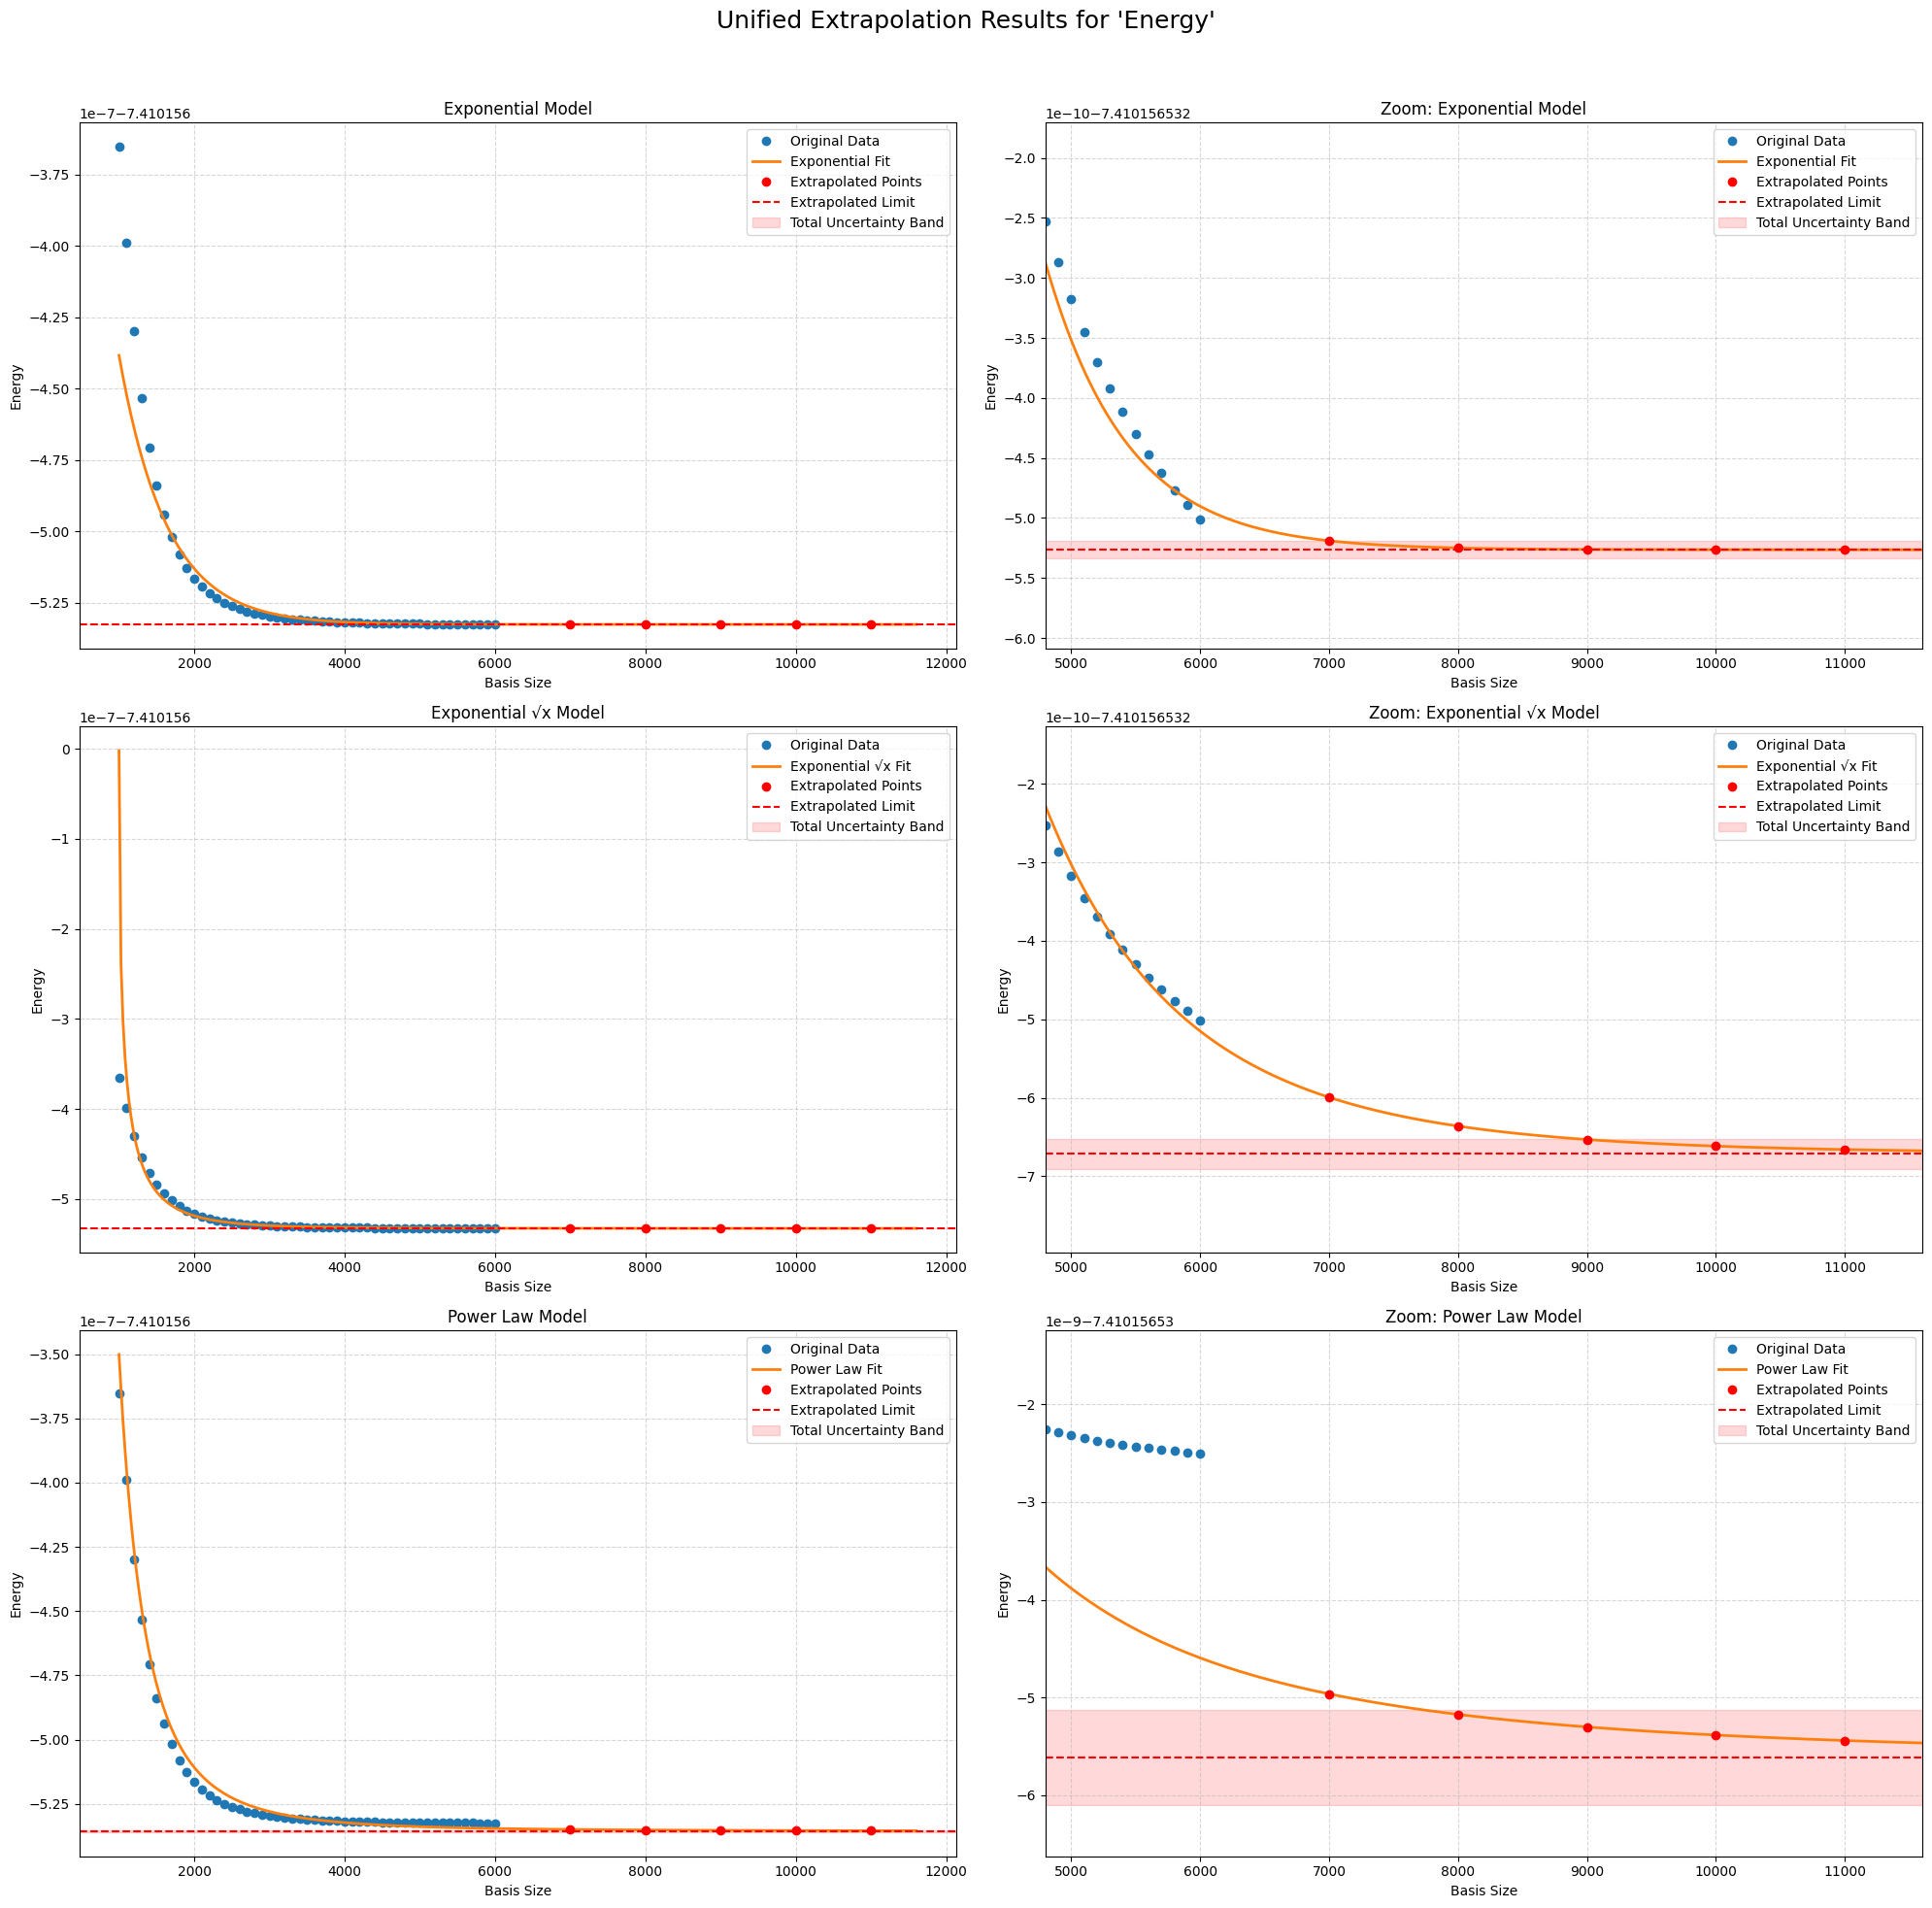

In [16]:
unified_extrapolator(li_2po_init).fit()